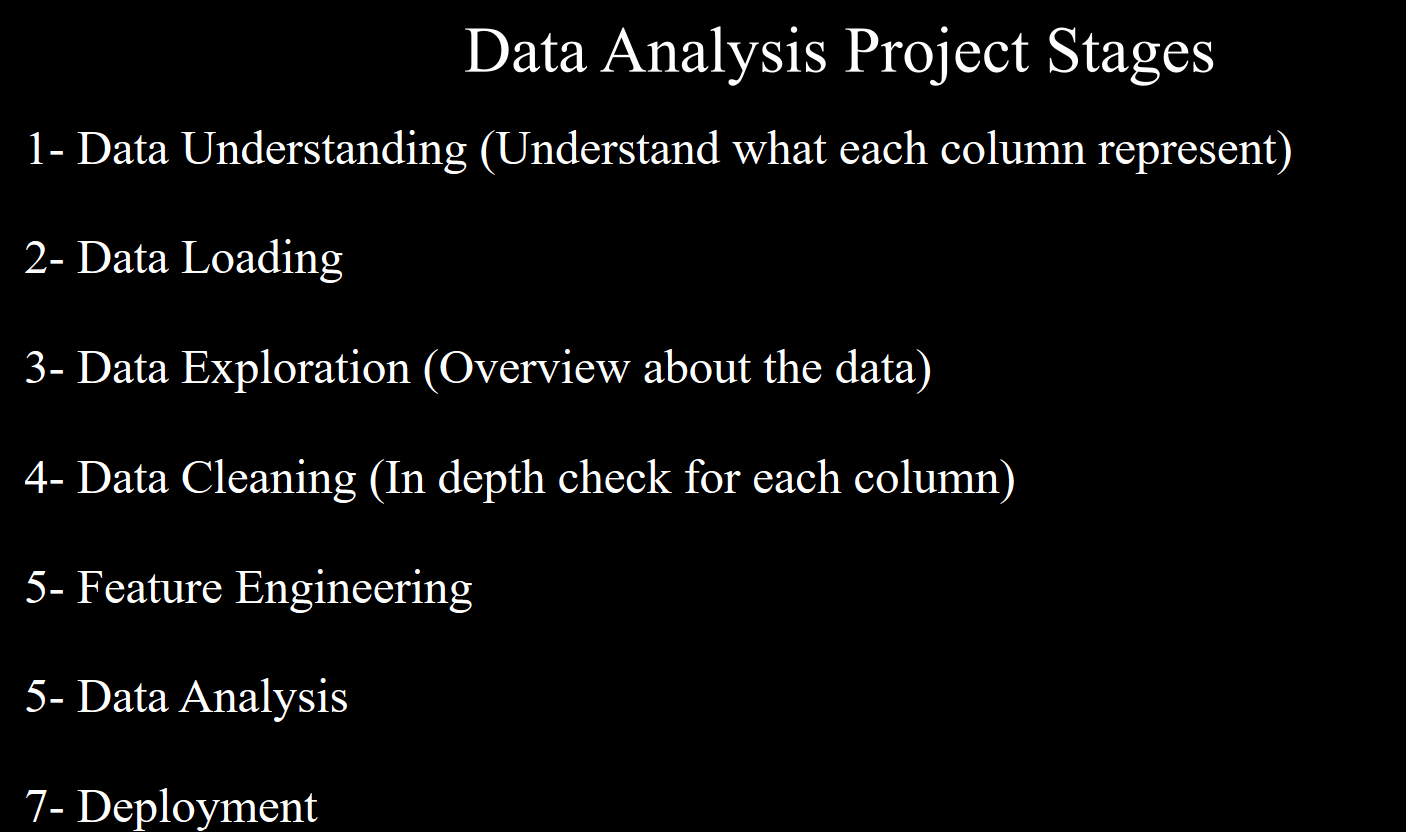

# Data Understanding

Attribute Information:

* 01 date : Date in MM-DD-YYYY
* 02 day : Day of the Week
* 03 quarter : A portion of the month. A month was divided into four quarters
* 04 department : Associated department with the instance
* 05 team_no : Associated team number with the instance
* 06 no_of_workers : Number of workers in each team
* 07 no_of_style_change : Number of changes in the style of a particular product
* 08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.
* 09 smv : Standard Minute Value, it is the allocated time for a task
* 10 wip : Work in progress. Includes the number of unfinished items for products
* 11 over_time : Represents the amount of overtime by each team in minutes
* 12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
* 13 idle_time : The amount of time when the production was interrupted due to several reasons
* 14 idle_men : The number of workers who were idle due to production interruption
* 15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

### Data Loading

In [2]:
df = pd.read_csv('garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


# Data Exploration

In [3]:
# Check Data Types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
# Check summary statistics for numerical

df.describe().round(2)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.00,1197.00,1197.00,691.00,1197.00,1197.00,1197.00,1197.00,1197.00,1197.00,1197.00
mean,6.43,0.73,15.06,1190.47,4567.46,38.21,0.73,0.37,0.15,34.61,0.74
std,3.46,0.10,10.94,1837.46,3348.82,160.18,12.71,3.27,0.43,22.20,0.17
min,1.00,0.07,2.90,7.00,0.00,0.00,0.00,0.00,0.00,2.00,0.23
25%,3.00,0.70,3.94,774.50,1440.00,0.00,0.00,0.00,0.00,9.00,0.65
50%,6.00,0.75,15.26,1039.00,3960.00,0.00,0.00,0.00,0.00,34.00,0.77
75%,9.00,0.80,24.26,1252.50,6960.00,50.00,0.00,0.00,0.00,57.00,0.85
max,12.00,0.80,54.56,23122.00,25920.00,3600.00,300.00,45.00,2.00,89.00,1.12


In [6]:
# Check summary statistics for Categorical columns

df.describe(include= 'object')

,date,quarter,department,day
count,1197,1197,1197,1197
unique,59,5,3,6
top,3/11/2015,Quarter1,sweing,Wednesday
freq,24,360,691,208


In [7]:
# Check duplicates

df.duplicated().sum()

0

In [8]:
# Check Missing Values

df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [11]:
df.isna().mean().round(4) * 100

date                      0.00
quarter                   0.00
department                0.00
day                       0.00
team                      0.00
targeted_productivity     0.00
smv                       0.00
wip                      42.27
over_time                 0.00
incentive                 0.00
idle_time                 0.00
idle_men                  0.00
no_of_style_change        0.00
no_of_workers             0.00
actual_productivity       0.00
dtype: float64

# Data Cleaning

### In depth check for categorical columns

In [16]:
cat_cols = df.select_dtypes(include= 'object').drop('date', axis= 1).columns
cat_cols

Index(['quarter', 'department', 'day'], dtype='object')

In [20]:
for col in cat_cols:

    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print('-' * 100)

quarter
5
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
----------------------------------------------------------------------------------------------------
department
3
['sweing' 'finishing ' 'finishing']
----------------------------------------------------------------------------------------------------
day
6
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
----------------------------------------------------------------------------------------------------


In [21]:
df.department.value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [24]:
df.department.str.strip().value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

In [29]:
def clean_dept(x):

    if x == 'finishing ':
        return 'finishing'
    
    else:
        return x
    
df.department = df.department.apply(clean_dept)
df.department.value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

In [37]:
df[df.quarter == 'Quarter5'][['date', 'quarter']]

,date,quarter
498,1/29/2015,Quarter5
499,1/29/2015,Quarter5
500,1/29/2015,Quarter5
501,1/29/2015,Quarter5
502,1/29/2015,Quarter5
503,1/29/2015,Quarter5
504,1/29/2015,Quarter5
505,1/29/2015,Quarter5
506,1/29/2015,Quarter5
507,1/29/2015,Quarter5


### In depth check for numerical columns

In [43]:
num_cols = df.select_dtypes(include= 'number').columns
num_cols

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

In [44]:
for col in num_cols:

    px.histogram(data_frame= df, x= col, title= col).show()

In [50]:
df.date = pd.to_datetime(df.date)

# Feature Engineering

In [52]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [53]:
df.date.describe()

count                             1197
mean     2015-02-04 10:56:50.526315776
min                2015-01-01 00:00:00
25%                2015-01-18 00:00:00
50%                2015-02-03 00:00:00
75%                2015-02-23 00:00:00
max                2015-03-11 00:00:00
Name: date, dtype: object

#### Create Target_Acheived column (Acheived, Not Acheived)

In [56]:
def target_acheived(x):

    if x['actual_productivity'] >= x['targeted_productivity']:
        return 'Acheived'
    
    else:
        return 'Not Acheived'

df['Target_Acheived'] = df.apply(target_acheived, axis= 1)
df['Target_Acheived']

0           Acheived
1           Acheived
2           Acheived
3           Acheived
4           Acheived
            ...     
1192    Not Acheived
1193    Not Acheived
1194    Not Acheived
1195    Not Acheived
1196    Not Acheived
Name: Target_Acheived, Length: 1197, dtype: object

In [62]:
df['day_of_month'] = df.date.dt.day
df['day_of_month']

0        1
1        1
2        1
3        1
4        1
        ..
1192    11
1193    11
1194    11
1195    11
1196    11
Name: day_of_month, Length: 1197, dtype: int32

In [65]:
df['month'] = df.date.dt.month_name()
df['month']

0       January
1       January
2       January
3       January
4       January
         ...   
1192      March
1193      March
1194      March
1195      March
1196      March
Name: month, Length: 1197, dtype: object

# Data Analysis

## Univariate

#### What is the percentage of number of emplyees in each department ?

In [67]:
px.pie(data_frame= df, names= 'department')

#### What is the distribution of actual productivity and outliers ?

In [69]:
px.box(data_frame= df, y= 'actual_productivity')

## Bivariate

#### Does number of workers increase productivity of employees ?

In [70]:
px.scatter(data_frame= df, x= 'no_of_workers', y= 'actual_productivity')

#### Is there any correlation between numerical columns ?

In [82]:
px.scatter_matrix(data_frame= df, dimensions= num_cols, width= 1600, height= 1600)

In [86]:
corr_df = df.corr(numeric_only= True).round(2)
corr_df

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_of_month
team,1.00,0.03,-0.11,-0.03,-0.10,-0.01,0.00,0.03,-0.01,-0.08,-0.15,0.02
targeted_productivity,0.03,1.00,-0.07,0.06,-0.09,0.03,-0.06,-0.05,-0.21,-0.08,0.42,-0.11
smv,-0.11,-0.07,1.00,-0.04,0.67,0.03,0.06,0.11,0.32,0.91,-0.12,0.00
wip,-0.03,0.06,-0.04,1.00,0.02,0.17,-0.03,-0.05,-0.07,0.03,0.13,-0.11
over_time,-0.10,-0.09,0.67,0.02,1.00,-0.00,0.03,-0.02,0.06,0.73,-0.05,0.03
incentive,-0.01,0.03,0.03,0.17,-0.00,1.00,-0.01,-0.02,-0.03,0.05,0.08,-0.04
idle_time,0.00,-0.06,0.06,-0.03,0.03,-0.01,1.00,0.56,-0.01,0.06,-0.08,-0.05
idle_men,0.03,-0.05,0.11,-0.05,-0.02,-0.02,0.56,1.00,0.13,0.11,-0.18,-0.02
no_of_style_change,-0.01,-0.21,0.32,-0.07,0.06,-0.03,-0.01,0.13,1.00,0.33,-0.21,0.19
no_of_workers,-0.08,-0.08,0.91,0.03,0.73,0.05,0.06,0.11,0.33,1.00,-0.06,-0.00


In [99]:
px.imshow(corr_df, height= 600, text_auto= True)

#### What is the actual productivity distribution per day ?

In [100]:
px.box(data_frame= df, x= 'day', y= 'actual_productivity')

#### What is the actual productivity distribution per team ?

In [102]:
px.box(data_frame= df, x= 'team', y= 'actual_productivity')

In [110]:
px.histogram(data_frame= df, x= 'actual_productivity', facet_col= 'team', width= 2000)

#### What is the average productivity per Target acheived ?

In [115]:
avg_prod = (df.groupby('Target_Acheived')['actual_productivity'].mean().round(4) * 100).reset_index()
avg_prod

,Target_Acheived,actual_productivity
0,Acheived,80.48
1,Not Acheived,54.56


In [123]:
px.bar(data_frame= avg_prod, x= 'Target_Acheived', y= 'actual_productivity', labels= {'actual_productivity' : 'Average Productivity'},
       text_auto= True, title= 'What is the average employees productivity per Target acheived ?',
       color_discrete_sequence= ["#06192C"])

### What is the number of teams in our data ?

In [ ]:
df.groupby('team')['team'].count().sort_values(ascending= False)

team
2     109
8     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

In [130]:
team_count = df.team.value_counts().reset_index()
team_count

,team,count
0,8,109
1,2,109
2,1,105
3,4,105
4,9,104
5,10,100
6,12,99
7,7,96
8,3,95
9,6,94


In [134]:
team_count.team =team_count.team.astype('str')
team_count.team

0      8
1      2
2      1
3      4
4      9
5     10
6     12
7      7
8      3
9      6
10     5
11    11
Name: team, dtype: object

In [137]:
px.bar(data_frame= team_count, x= 'team', y= 'count', text_auto= True)

### What is the average Productivity per Target acheived per department ?

In [138]:
avg_prod_per_dept = (df.groupby(['Target_Acheived', 'department'])['actual_productivity'].mean().round(4) * 100).reset_index()
avg_prod_per_dept

,Target_Acheived,department,actual_productivity
0,Acheived,finishing,88.31
1,Acheived,sweing,76.36
2,Not Acheived,finishing,56.03
3,Not Acheived,sweing,52.01


In [144]:
px.bar(data_frame= avg_prod_per_dept, x= 'Target_Acheived', y= 'actual_productivity',
       color= 'department', barmode= 'group',
       labels= {'actual_productivity' : 'Average Productivity'},
       text_auto= True, title= 'What is the average employees productivity per Target acheived ?',
       color_discrete_sequence= ["#06192C", "#C9DCEF"])

In [145]:
avg_prod_per_dept_per_month = (df.groupby(['Target_Acheived', 'department', 'month'])['actual_productivity'].mean().round(4) * 100).reset_index()
avg_prod_per_dept_per_month

,Target_Acheived,department,month,actual_productivity
0,Acheived,finishing,February,89.21
1,Acheived,finishing,January,89.12
2,Acheived,finishing,March,84.62
3,Acheived,sweing,February,77.08
4,Acheived,sweing,January,76.55
5,Acheived,sweing,March,74.44
6,Not Acheived,finishing,February,55.26
7,Not Acheived,finishing,January,57.46
8,Not Acheived,finishing,March,54.76
9,Not Acheived,sweing,February,52.55


In [146]:
px.bar(data_frame= avg_prod_per_dept_per_month, x= 'Target_Acheived', y= 'actual_productivity',
       color= 'department', barmode= 'group', facet_col= 'month',
       labels= {'actual_productivity' : 'Average Productivity'},
       text_auto= True, title= 'What is the average employees productivity per Target acheived ?',
       color_discrete_sequence= ["#06192C", "#C9DCEF"])

# Deployment

# Data Preprocessing

* 1- Split Data into Input Features and Target Variable
* 2- Split Data into Train & Test
* 3- Numerical : Impute Missing ---> Scaling
* 4- Categorical : Impute Missing ---> Encoding

In [ ]:
# Drop unnecessary columns
df.drop('date', axis= 1, inplace= True)

In [149]:
df.duplicated().sum()

0

### Split Data into Input Features and Target Variable

In [151]:
x = df.drop('actual_productivity', axis= 1)
y = df['actual_productivity']

### Split Data into Train and Test

In [153]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [155]:
px.histogram(data_frame= x_train, x= 'wip')

## Numerical

### Impute Missing

In [162]:
num_cols = x_train.select_dtypes(include= 'number').columns
num_cols

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'day_of_month'],
      dtype='object')

In [168]:
from sklearn.impute import KNNImputer

knn = KNNImputer()

x_train[num_cols] = knn.fit_transform(x_train[num_cols])

x_test[num_cols] = knn.transform(x_test[num_cols])

In [169]:
px.histogram(data_frame= x_train, x= 'wip')

In [170]:
scaling_cols = ['smv','wip','over_time','incentive','idle_time']
scaling_cols

['smv', 'wip', 'over_time', 'incentive', 'idle_time']

In [172]:
from sklearn.preprocessing import RobustScaler

rc = RobustScaler()

x_train[scaling_cols] = rc.fit_transform(x_train[scaling_cols])
x_test[scaling_cols] = rc.transform(x_test[scaling_cols])

In [175]:
x_train.team = x_train.team.astype('str')

x_test.team = x_test.team.astype('str')

## Categorical

### Nominal

In [176]:
x_train.select_dtypes(include= 'object')

,quarter,department,day,team,Target_Acheived,month
1189,Quarter2,sweing,Wednesday,8.0,Acheived,March
575,Quarter1,finishing,Monday,1.0,Not Acheived,February
76,Quarter1,finishing,Monday,10.0,Acheived,January
731,Quarter2,finishing,Thursday,4.0,Acheived,February
138,Quarter2,sweing,Thursday,12.0,Acheived,January
...,...,...,...,...,...,...
1044,Quarter1,finishing,Tuesday,5.0,Not Acheived,March
1095,Quarter1,finishing,Saturday,6.0,Acheived,March
1130,Quarter2,finishing,Monday,5.0,Acheived,March
860,Quarter3,sweing,Thursday,7.0,Not Acheived,February


In [ ]:
for col in x_train.select_dtypes(include= 'object').columns:
    
    print(col)
    print(x_train[col].nunique())

quarter
5
department
2
day
6
team
12
Target_Acheived
2
month
3


#### OneHotEncoder

In [185]:
ohe_cols = x_train.select_dtypes(include= 'object').drop('team', axis = 1).columns
ohe_cols

Index(['quarter', 'department', 'day', 'Target_Acheived', 'month'], dtype='object')

In [187]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output= False, drop= 'first')

ohe_train = ohe.fit_transform(x_train[ohe_cols])

ohe_test = ohe.transform(x_test[ohe_cols])

In [189]:
ohe.get_feature_names_out()

array(['quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_sweing', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday',
       'Target_Acheived_Not Acheived', 'month_January', 'month_March'],
      dtype=object)

In [191]:
ohe_train_df = pd.DataFrame(ohe_train, columns= ohe.get_feature_names_out())

ohe_test_df = pd.DataFrame(ohe_test, columns= ohe.get_feature_names_out())

In [193]:
ohe_train_df

,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,Target_Acheived_Not Acheived,month_January,month_March
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
953,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
954,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
955,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [194]:
x_train

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,Target_Acheived,day_of_month,month
1189,Quarter2,sweing,Wednesday,8.0,0.70,0.767224,0.181507,0.527473,0.60,0.0,0.0,1.0,57.0,Acheived,11.0,March
575,Quarter1,finishing,Monday,1.0,0.75,-0.538878,0.062072,-0.307692,0.00,0.0,0.0,0.0,19.0,Not Acheived,2.0,February
76,Quarter1,finishing,Monday,10.0,0.75,-0.590059,-0.431507,-0.549451,0.00,0.0,0.0,0.0,8.0,Acheived,5.0,January
731,Quarter2,finishing,Thursday,4.0,0.70,-0.528543,-0.420377,-0.395604,0.00,0.0,0.0,0.0,15.0,Acheived,12.0,February
138,Quarter2,sweing,Thursday,12.0,0.80,-0.161417,-0.601884,2.043956,1.26,0.0,0.0,0.0,31.5,Acheived,8.0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,Quarter1,finishing,Tuesday,5.0,0.70,-0.506398,-0.022260,-0.109890,0.00,0.0,0.0,0.0,8.0,Not Acheived,3.0,March
1095,Quarter1,finishing,Saturday,6.0,0.50,-0.590059,-0.431507,-0.549451,0.00,0.0,0.0,0.0,8.0,Acheived,7.0,March
1130,Quarter2,finishing,Monday,5.0,0.60,-0.538878,1.146832,-0.725275,57.60,0.0,0.0,0.0,12.0,Acheived,9.0,March
860,Quarter3,sweing,Thursday,7.0,0.75,0.748524,-0.824486,-0.725275,0.00,5.0,20.0,1.0,59.0,Not Acheived,19.0,February


In [196]:
x_train.reset_index(inplace= True, drop= True)

x_test.reset_index(inplace= True, drop= True)

y_train.reset_index(inplace= True, drop= True)

y_test.reset_index(inplace= True, drop= True)

In [199]:
x_train = pd.concat([x_train, ohe_train_df], axis= 1).drop(ohe_cols, axis= 1)

x_test = pd.concat([x_test, ohe_test_df], axis= 1).drop(ohe_cols, axis= 1)

In [202]:
from category_encoders import BinaryEncoder

be = BinaryEncoder()

be_train_df = be.fit_transform(x_train[['team']])

be_test_df = be.transform(x_test[['team']])

In [206]:
x_train = pd.concat([x_train, be_train_df], axis= 1).drop('team', axis = 1)

x_test = pd.concat([x_test, be_test_df], axis= 1).drop('team', axis = 1)

In [207]:
x_train.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,day_of_month,...,day_Thursday,day_Tuesday,day_Wednesday,Target_Acheived_Not Acheived,month_January,month_March,team_0,team_1,team_2,team_3
0,0.70,0.767224,0.181507,0.527473,0.60,0.0,0.0,1.0,57.0,11.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,1
1,0.75,-0.538878,0.062072,-0.307692,0.00,0.0,0.0,0.0,19.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0
2,0.75,-0.590059,-0.431507,-0.549451,0.00,0.0,0.0,0.0,8.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,1
3,0.70,-0.528543,-0.420377,-0.395604,0.00,0.0,0.0,0.0,15.0,12.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
4,0.80,-0.161417,-0.601884,2.043956,1.26,0.0,0.0,0.0,31.5,8.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,1


In [208]:
y_train

0      0.700505
1      0.504596
2      0.763375
3      1.096633
4      0.800107
         ...   
952    0.354444
953    0.797500
954    0.864343
955    0.611141
956    0.441042
Name: actual_productivity, Length: 957, dtype: float64